In [1]:
#導入函式
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn import datasets
from sklearn.neighbors import KNeighborsRegressor

In [2]:
#匯入資料(csv需儲存在同資料夾下)
train_data = pd.read_csv('adult.train.txt', header=None,  names=["age","workclass","fnlwgt","education","education_num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","money"])
test_data = pd.read_csv('adult.test.txt', header=None,  names=["age","workclass","fnlwgt","education","education_num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","money"])

In [3]:
train_data

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,money
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# 前置處理

In [4]:
#將資料中含?的資料列刪除
train_data=train_data.replace(' ?', np.NaN)
train_data.dropna(inplace=True)
test_data=test_data.replace(' ?', np.NaN)
test_data.dropna(inplace=True)

In [5]:
#資料型態轉換
le=LabelEncoder()
for col in train_data[["workclass","education","marital-status","occupation","relationship","race","sex","native-country","money"]]:
    train_data[col]=le.fit_transform(train_data[col]).astype(np.int64)
for col in test_data[["workclass","education","marital-status","occupation","relationship","race","sex","native-country","money"]]:
    test_data[col]=le.fit_transform(test_data[col]).astype(np.int64)

In [6]:
#因為hours-per-week是之後要預測的變數，所以將X的hours-per-week欄位刪除
#X = train_data.drop('hours-per-week',axis=1)
#將hours-per-week欄位給y
#y = train_data['hours-per-week']
X_train = train_data.drop('hours-per-week',axis=1)
y_train = train_data['hours-per-week']
X_test = test_data.drop('hours-per-week',axis=1)
y_test = test_data['hours-per-week']

In [7]:
#資料正規化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)

X_test = ss.fit_transform(X_test)

In [8]:
#查看資料型態
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   workclass       30162 non-null  int64
 2   fnlwgt          30162 non-null  int64
 3   education       30162 non-null  int64
 4   education_num   30162 non-null  int64
 5   marital-status  30162 non-null  int64
 6   occupation      30162 non-null  int64
 7   relationship    30162 non-null  int64
 8   race            30162 non-null  int64
 9   sex             30162 non-null  int64
 10  capital-gain    30162 non-null  int64
 11  capital-loss    30162 non-null  int64
 12  hours-per-week  30162 non-null  int64
 13  native-country  30162 non-null  int64
 14  money           30162 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


# RandomForest Regression

In [9]:
#創建隨機森林回歸模型
ran_for = RandomForestRegressor(n_estimators = 200, max_depth = 10, random_state = 18)
ran_for.fit(X_train, y_train.values)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=18)

In [10]:
ran_for.score(X_test, y_test)

0.25276052324346754

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

#對測試數據進行預測(隨機森林)
prediction = ran_for.predict(X_test)

#計算均方誤差
mse = mean_squared_error(y_test, prediction)
#計算均方根誤差
rmse = mse**.5
#計算平均絕對誤差
mae = mean_absolute_error(y_test, prediction)
#計算平均絕對百分比誤差
mape = mean_absolute_percentage_error(y_test, prediction)
# 計算並顯示準確率
accuracy = 100 - mape*100
print('準確率：', round(accuracy, 2), '%.')

print('MSE：',round(mse,2))
print('MAE：',round(mae,2))
print('RMSE：',round(rmse,2))
print('MAPE：',round(mape,2))

準確率： 73.87 %.
MSE： 108.73
MAE： 7.01
RMSE： 10.43
MAPE： 0.26


# KNN

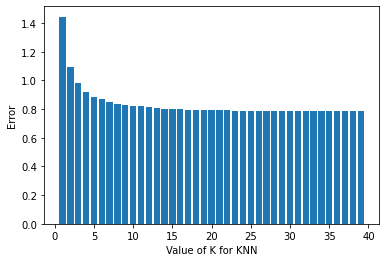

32

In [12]:
from sklearn.neighbors import KNeighborsRegressor
ks = [] 
score = [] 
k_range = range(1, 40)
k_error = []
for k in k_range:  # 窮舉k值在1~40中的數
    knn = KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    k_error.append(1-scores)
    ks.append(k)
    score.append(scores)
plt.bar(k_range, k_error)
plt.xlabel('Value of K for KNN')
plt.ylabel('Error')
plt.show()
arr_ks = np.array(ks)
arr_scores = np.array(score)
arr_ks,arr_scores
np.argmax(arr_scores) 
arr_ks[np.argmax(arr_scores)]

In [12]:
# 建立 KNN 模型
knnModel = KNeighborsRegressor(n_neighbors=32)
# 使用訓練資料訓練模型
knnModel.fit(X_train,y_train)
# 使用訓練資料預測
prediction= knnModel.predict(X_test)

In [13]:
knnModel.score(X_test,y_test)

0.21264932172570583

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

#計算均方誤差
mse = mean_squared_error(y_test, prediction)
#計算均方根誤差
rmse = mse**.5
#計算平均絕對誤差
mae = mean_absolute_error(y_test, prediction)
#計算平均絕對百分比誤差
mape = mean_absolute_percentage_error(y_test, prediction)
# 計算並顯示準確率
accuracy = 100 - mape*100
print('準確率：', round(accuracy, 2), '%.')

#print('MSE：',round(mse,2))
print('MAE：',round(mae,2))
print('RMSE：',round(rmse,2))
print('MAPE：',round(mape,2))

準確率： 72.34 %.
MAE： 7.32
RMSE： 10.7
MAPE： 0.28


# SVR

In [15]:
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
# 建立 kernel='linear' 模型
linearModel=svm.SVR(C=3, kernel='linear')
# 使用訓練資料訓練模型
linearModel.fit(X_train, y_train)
# 使用訓練資料預測分類
prediction=linearModel.predict(X_test)

#計算均方誤差
mse = mean_squared_error(y_test, prediction)
#計算均方根誤差
rmse = mse**.5
#計算平均絕對誤差
mae = mean_absolute_error(y_test, prediction)
#計算平均絕對百分比誤差
mape = mean_absolute_percentage_error(y_test, prediction)
# 計算並顯示準確率
accuracy = 100 - mape*100
print('準確率：', round(accuracy, 2), '%.')

print('MSE：',round(mse,2))
print('MAE：',round(mae,2))
print('RMSE：',round(rmse,2))
print('MAPE：',round(mape,2))

準確率： 70.48 %.
MSE： 143.28
MAE： 7.17
RMSE： 11.97
MAPE： 0.3


# 特徵重要性

Feature: 0, Score: 0.41944
Feature: 1, Score: 0.06230
Feature: 2, Score: 0.10213
Feature: 3, Score: 0.03950
Feature: 4, Score: 0.04779
Feature: 5, Score: 0.01660
Feature: 6, Score: 0.07303
Feature: 7, Score: 0.03633
Feature: 8, Score: 0.01179
Feature: 9, Score: 0.10420
Feature: 10, Score: 0.01737
Feature: 11, Score: 0.01102
Feature: 12, Score: 0.01133
Feature: 13, Score: 0.04717


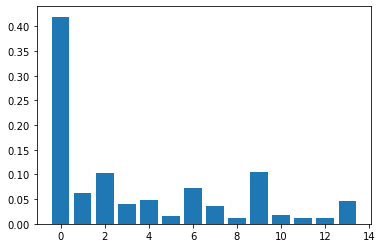

In [19]:
#特徵重要性
from matplotlib import pyplot
importance = ran_for.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

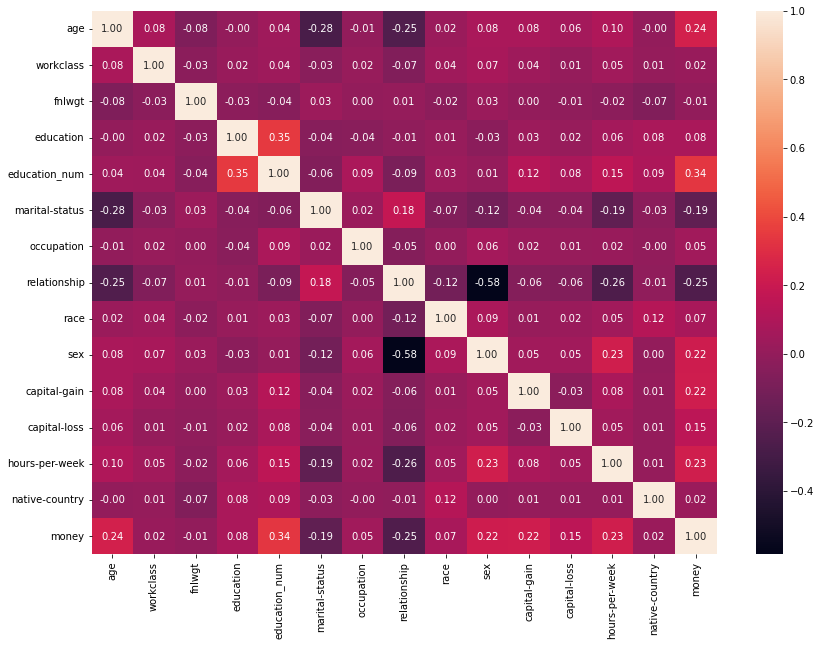

In [20]:
#相關的特徵：數字越高，相關性越高
plt.figure(figsize=(14,10))
sns.heatmap(train_data.corr(),annot=True,fmt='.2f')
plt.show()

<AxesSubplot:xlabel='native-country', ylabel='hours-per-week'>

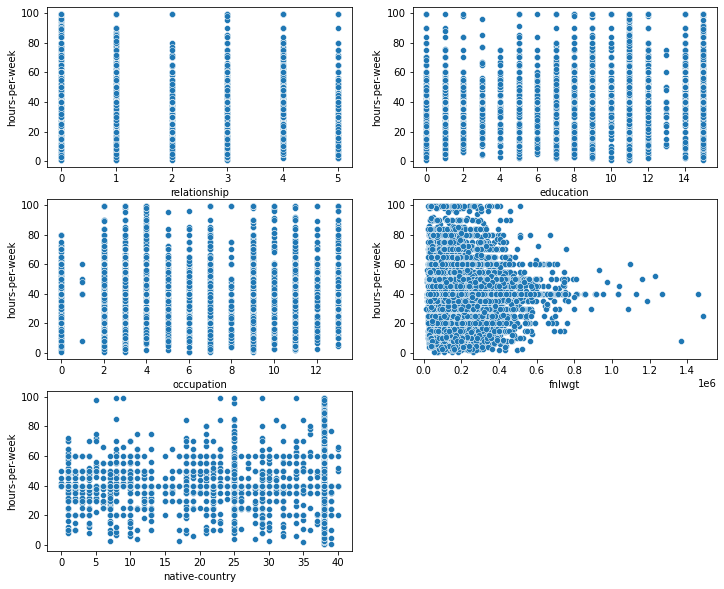

In [21]:
#根據hours-per-week繪製欄位之間的特徵(可不放)
fig = plt.figure(figsize=(12,10))

#relationship欄位
plt.subplot(321)
sns.scatterplot(data=train_data, x='relationship', y="hours-per-week")
#education欄位
plt.subplot(322)
sns.scatterplot(data=train_data, x='education', y="hours-per-week")
#occupation欄位
plt.subplot(323)
sns.scatterplot(data=train_data, x='occupation', y="hours-per-week")
#fnlwgt欄位
plt.subplot(324)
sns.scatterplot(data=train_data, x='fnlwgt', y="hours-per-week")
#native-country欄位
plt.subplot(325)
sns.scatterplot(data=train_data, x='native-country', y="hours-per-week")

#### 從相關特徵圖中我們可以看出“education”和“education.num”高度相關，“marital.status”和“relationship”也是如此，因此我們可以去掉“relationship”和“education”。我們也可以放棄“occupation”，因為“workclass”就足夠了。此外，“fnlwgt”對我們沒有用，因為它僅指進行的人口普查中的抽樣，對標籤沒有實際影響。我們也刪除了“native.country”，因為大部分都來自單一國家（美國），可能會造成偏見。

# 刪除特徵

In [16]:
train_data=train_data.drop(['relationship','education','occupation','fnlwgt','native-country'],axis=1)

In [17]:
train_data

,age,workclass,education_num,marital-status,race,sex,capital-gain,capital-loss,hours-per-week,money
0,39,5,13,4,4,1,2174,0,40,0
1,50,4,13,2,4,1,0,0,13,0
2,38,2,9,0,4,1,0,0,40,0
3,53,2,7,2,2,1,0,0,40,0
4,28,2,13,2,2,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...
32556,27,2,12,2,4,0,0,0,38,0
32557,40,2,9,2,4,1,0,0,40,1
32558,58,2,9,6,4,0,0,0,40,0
32559,22,2,9,4,4,1,0,0,20,0


In [18]:
test_data=test_data.drop(['relationship','education','occupation','fnlwgt','native-country'],axis=1)

In [19]:
test_data

,age,workclass,education_num,marital-status,race,sex,capital-gain,capital-loss,hours-per-week,money
0,25,2,7,4,2,1,0,0,40,0
1,38,2,9,2,4,1,0,0,50,0
2,28,1,12,2,4,1,0,0,40,1
3,44,2,10,2,2,1,7688,0,40,1
5,34,2,6,4,4,1,0,0,30,0
...,...,...,...,...,...,...,...,...,...,...
16275,33,2,13,4,4,1,0,0,40,0
16276,39,2,13,0,4,0,0,0,36,0
16278,38,2,13,2,4,1,0,0,50,0
16279,44,2,13,0,1,1,5455,0,40,0


In [20]:
#因為hours-per-week是之後要預測的變數，所以將X的hours-per-week欄位刪除
#X = train_data.drop('hours-per-week',axis=1)
#將hours-per-week欄位給y
#y = train_data['hours-per-week']
X_train = train_data.drop('hours-per-week',axis=1)
y_train = train_data['hours-per-week']
X_test = test_data.drop('hours-per-week',axis=1)
y_test = test_data['hours-per-week']

# 刪除特徵後-RandomForest Regression

In [24]:
#創建隨機森林回歸模型
ran_for = RandomForestRegressor(n_estimators = 200, max_depth = 10, random_state = 18)
ran_for.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=18)

In [22]:
ran_for.score(X_test, y_test)

0.22216852928567832

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

#對測試數據進行預測(線性回歸)
prediction = ran_for.predict(X_test)

#計算均方誤差
mse = mean_squared_error(y_test, prediction)
#計算均方根誤差
rmse = mse**.5
#計算平均絕對誤差
mae = mean_absolute_error(y_test, prediction)
#計算平均絕對百分比誤差
mape = mean_absolute_percentage_error(y_test, prediction)
# 計算並顯示準確率
accuracy = 100 - mape*100
print('準確率：', round(accuracy, 2), '%.')

#print('MSE：',round(mse,2))
print('MAE：',round(mae,2))
print('RMSE：',round(rmse,2))
print('MAPE：',round(mape,2))

準確率： 73.43 %.
MAE： 7.19
RMSE： 10.64
MAPE： 0.27


# 刪除特徵後-KNN

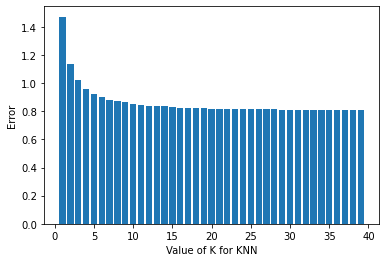

38

In [30]:
ks = [] 
score = [] 
k_range = range(1, 40)
k_error = []
for k in k_range:  # 窮舉k值在1~40中的數
    knn = KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    k_error.append(1-scores)
    ks.append(k)
    score.append(scores)
plt.bar(k_range, k_error)
plt.xlabel('Value of K for KNN')
plt.ylabel('Error')
plt.show()
arr_ks = np.array(ks)
arr_scores = np.array(score)
arr_ks,arr_scores
np.argmax(arr_scores) 
arr_ks[np.argmax(arr_scores)]

In [24]:
# 建立 KNN 模型
knnModel = KNeighborsRegressor(n_neighbors=38)
# 使用訓練資料訓練模型
knnModel.fit(X_train,y_train)
# 使用訓練資料預測
prediction= knnModel.predict(X_test)

In [25]:
knnModel.score(X_test,y_test)

0.192760209143093

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

#計算均方誤差
mse = mean_squared_error(y_test, prediction)
#計算均方根誤差
rmse = mse**.5
#計算平均絕對誤差
mae = mean_absolute_error(y_test, prediction)
#計算平均絕對百分比誤差
mape = mean_absolute_percentage_error(y_test, prediction)
# 計算並顯示準確率
accuracy = 100 - mape*100
print('準確率：', round(accuracy, 2), '%.')

#print('MSE：',round(mse,2))
print('MAE：',round(mae,2))
print('RMSE：',round(rmse,2))
print('MAPE：',round(mape,2))

準確率： 72.57 %.
MAE： 7.34
RMSE： 10.84
MAPE： 0.27


# 刪除特徵後-SVR

In [ ]:
# 建立 kernel='linear' 模型
linearModel=svm.SVR(C=1, kernel='linear')
# 使用訓練資料訓練模型
linearModel.fit(X_train, y_train)
# 使用訓練資料預測分類
prediction=linearModel.predict(X_test)

#計算均方誤差    
mse = mean_squared_error(y_test, prediction)
#計算均方根誤差
rmse = mse**.5
#計算平均絕對誤差
mae = mean_absolute_error(y_test, prediction)
#計算平均絕對百分比誤差
mape = mean_absolute_percentage_error(y_test, prediction)
# 計算並顯示準確率
accuracy = 100 - mape*100
print('準確率：', round(accuracy, 2), '%.')

print('MSE：',round(mse,2))
print('MAE：',round(mae,2))
print('RMSE：',round(rmse,2))
print('MAPE：',round(mape,2))